## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combineDataset = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combineDataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
newData = combineDataset.groupby("Drug Regimen")

tumorMean = newData["Tumor Volume (mm3)"].mean()
tumorMedian = newData["Tumor Volume (mm3)"].median()
tumorVariance = newData["Tumor Volume (mm3)"].var()
tumorStdDev = newData["Tumor Volume (mm3)"].std()
tumorSem = newData["Tumor Volume (mm3)"].sem()

drugRegimen_df = pd.DataFrame({"Tumor Volume Mean": tumorMean, "Tumor Volume Median": tumorMedian, 
                               "Tumor Volume Variance": tumorVariance, "Tumor Volume Std. Deviation": tumorStdDev,
                              "Tumor Volume Std. Error": tumorSem})

drugRegimen_df.style.format({"Tumor Volume Mean":"{:,.3f}", "Tumor Volume Median":"{:,.3f}", 
                            "Tumor Volume Variance":"{:,.3f}", "Tumor Volume Std. Deviation":"{:,.3f}",
                            "Tumor Volume Std. Error":"{:,.3f}"})


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

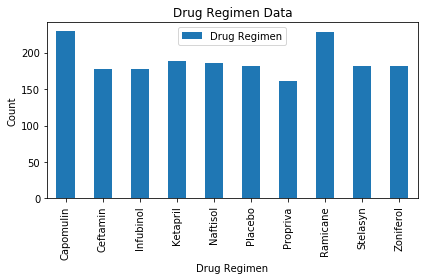

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugRegimenValue = pd.DataFrame(newData["Drug Regimen"].count())

drugRegimenValue.plot(kind="bar", title="Drug Regimen Data")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

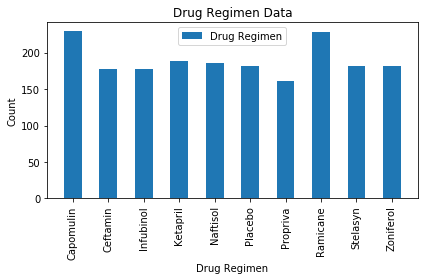

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axisDrug = np.arange(len(drugRegimenValue))
xtick_Locations = [values for values in x_axisDrug]

plt.bar(x_axisDrug, drugRegimenValue["Drug Regimen"], align="center", width=0.5)
plt.xticks(xtick_Locations, list(drugRegimenValue.index), rotation="vertical")
label = ["Drug Regimen"] 
plt.legend(label, loc="upper center")
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Pie plots

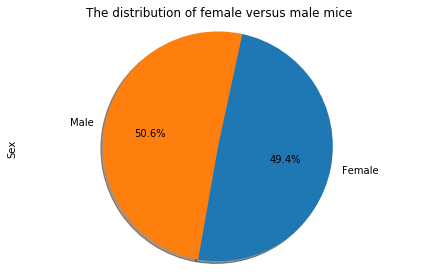

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genderData = combineDataset.groupby("Sex")
genderData_df = pd.DataFrame(genderData["Sex"].count())

genderData_df.plot(kind="pie", y="Sex", title="The distribution of female versus male mice", 
                   autopct="%1.1f%%", startangle=260, shadow= True, legend=False)
plt.axis("equal")
plt.tight_layout()
plt.show()

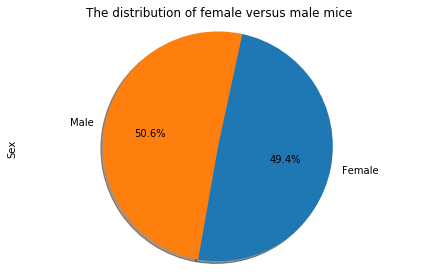

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(genderData_df['Sex'], labels=list(genderData_df.index.values), autopct="%1.1f%%", startangle=260, shadow = True)
plt.axis("equal")
plt.title("The distribution of female versus male mice")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#parse out data from original dataframe and run calculations that will be used for graphing

#Capomulin Regimen and Final Timepoint, w/ Calculations for  Quartiles
capoData_df = combineDataset.loc[combineDataset['Drug Regimen'] == 'Capomulin',:] 
capoTime = capoData_df.groupby('Mouse ID').max()['Timepoint'] 
capoTime_df = pd.DataFrame(capoTime)
capoTimeFinal = pd.merge(capoTime_df, combineDataset, on=('Mouse ID','Timepoint'), how='left')

tumorCapo = capoTimeFinal["Tumor Volume (mm3)"]
quartiles = tumorCapo.quantile([.25,.5,.75])
lowerQuartCapo = quartiles[0.25]
upperQuartCapo= quartiles[0.75]
iqr = upperQuartCapo-lowerQuartCapo
lower_boundCapo = lowerQuartCapo - (1.5*iqr)
upper_boundCapo = upperQuartCapo + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {(lower_boundCapo):.3f} and above {(upper_boundCapo):.3f} could be outliers.")

#Ramicane Regimen and Final Timepoint, w/ Calculations for  Quartiles
ramiData_df = combineDataset.loc[combineDataset['Drug Regimen'] == 'Ramicane',:] 
ramiTime = ramiData_df.groupby('Mouse ID').max()['Timepoint'] 
ramiTime_df = pd.DataFrame(ramiTime)
ramiTimeFinal = pd.merge(ramiTime_df, combineDataset, on=('Mouse ID','Timepoint'), how='left')

tumorRami = ramiTimeFinal["Tumor Volume (mm3)"]
quartiles = tumorRami.quantile([.25,.5,.75])
lowerQuartRami = quartiles[0.25]
upperQuartRami= quartiles[0.75]
iqr = upperQuartRami-lowerQuartRami
lower_boundRami = lowerQuartRami - (1.5*iqr)
upper_boundRami = upperQuartRami + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {(lower_boundRami):.3f} and above {(upper_boundRami):.3f} could be outliers.")

#Infubinol Regimen and Final Timepoint, w/ Calculations for  Quartiles
infuData_df = combineDataset.loc[combineDataset['Drug Regimen'] == 'Infubinol',:] 
infuTime = infuData_df.groupby('Mouse ID').max()['Timepoint'] 
infuTime_df = pd.DataFrame(infuTime)
infuTimeFinal = pd.merge(infuTime_df, combineDataset, on=('Mouse ID','Timepoint'), how='left')

tumorInfu = infuTimeFinal["Tumor Volume (mm3)"]
quartiles = tumorInfu.quantile([.25,.5,.75])
lowerQuartInfu = quartiles[0.25]
upperQuartInfu= quartiles[0.75]
iqr = upperQuartInfu-lowerQuartInfu
lower_boundInfu = lowerQuartInfu - (1.5*iqr)
upper_boundInfu = upperQuartInfu + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {(lower_boundInfu):.3f} and above {(upper_boundInfu):.3f} could be outliers.")

#Ceftamin Regimen and Final Timepoint, w/ Calculations for  Quartiles
ceftData_df = combineDataset.loc[combineDataset['Drug Regimen'] == 'Ceftamin',:] 
ceftTime = ceftData_df.groupby('Mouse ID').max()['Timepoint'] 
ceftTime_df = pd.DataFrame(ceftTime)
ceftTimeFinal = pd.merge(ceftTime_df, combineDataset, on=('Mouse ID','Timepoint'), how='left')

tumorCeft = ceftTimeFinal["Tumor Volume (mm3)"]
quartiles = tumorCeft.quantile([.25,.5,.75])
lowerQuartCeft = quartiles[0.25]
upperQuartCeft= quartiles[0.75]
iqr = upperQuartCeft-lowerQuartCeft
lower_boundCeft = lowerQuartCeft - (1.5*iqr)
upper_boundCeft = upperQuartCeft + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {(lower_boundCeft):.3f} and above {(upper_boundCeft):.3f} could be outliers.")

Capomulin potential outliers could be values below 20.705 and above 51.832 could be outliers.
Ramicane potential outliers could be values below 17.913 and above 54.307 could be outliers.
Infubinol potential outliers could be values below 36.833 and above 82.741 could be outliers.
Ceftamin potential outliers could be values below 25.355 and above 87.666 could be outliers.


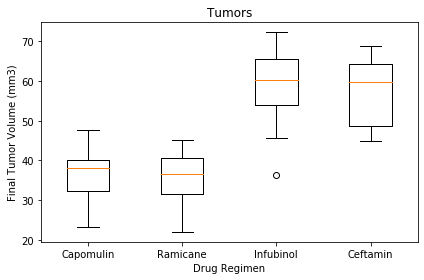

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dataPlot = [tumorCapo, tumorRami, tumorInfu, tumorCeft]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(dataPlot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.tight_layout()
plt.show()

## Line and scatter plots

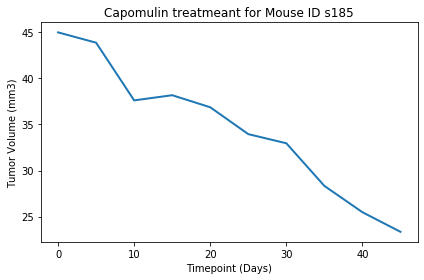

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capoLine = capoData_df.loc[capoData_df['Mouse ID'] == 's185']
x_axisCapo = capoLine['Timepoint']
tumorVolume = capoLine['Tumor Volume (mm3)']

plt.title('Capomulin treatmeant for Mouse ID s185')
plt.plot(x_axisCapo, tumorVolume ,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

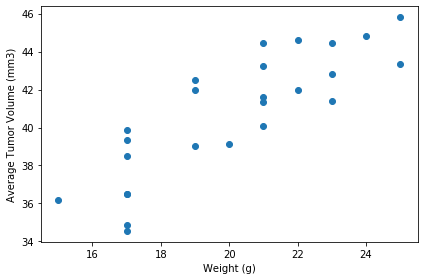

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avgCapo = capoData_df.groupby(['Mouse ID']).mean()
plt.scatter(avgCapo['Weight (g)'],avgCapo['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen